# Imports 

In [9]:
import pandas as pd
import numpy as np
import os 
current_folder = os.getcwd()
print(current_folder)
parent_folder = os.path.dirname(current_folder)
os.chdir(parent_folder)


/home/araceli/code/energy-analysis-and-predictions


In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from load_data.load_green_energy_data import load_green_energy_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test load one file

In [5]:
folder = 'raw_data/energy-companies/green_energies_DE/Photovoltaik/'
file = 'Realisierte_Erzeugung_202107060059_202107080059_viertelstunde.csv'

df = pd.read_csv(folder+file, delimiter=';', decimal=',')
df.columns = ['Datum', 'Anfang', 'Ende', 'Photovoltaik [MWh]']
print(df.shape)
df.head()

(192, 4)


,Datum,Anfang,Ende,Photovoltaik [MWh]
0,06.07.2021,01:00,01:15,0
1,06.07.2021,01:15,01:30,0
2,06.07.2021,01:30,01:45,0
3,06.07.2021,01:45,02:00,0
4,06.07.2021,02:00,02:15,0


In [6]:
type(df['Photovoltaik [MWh]'][0])

str

In [14]:
df['Photovoltaik [MWh]'].dtype=='float64'

True

In [7]:
#df_test['Timestamp'] = pd.to_datetime(df_test['Datum'] + ' ' + df_test['Ende'], format='%m.%d.%Y %H:%M')
df['Timestamp'] = pd.to_datetime(df['Datum'] + ' ' + df['Ende'], format='%d.%m.%Y %H:%M')
df.head()

,Datum,Anfang,Ende,Photovoltaik [MWh],Timestamp
0,06.07.2021,01:00,01:15,0,2021-07-06 01:15:00
1,06.07.2021,01:15,01:30,0,2021-07-06 01:30:00
2,06.07.2021,01:30,01:45,0,2021-07-06 01:45:00
3,06.07.2021,01:45,02:00,0,2021-07-06 02:00:00
4,06.07.2021,02:00,02:15,0,2021-07-06 02:15:00


In [32]:
df.tail()

,Datum,Anfang,Ende,Photovoltaik [MWh],Timestamp
283,03.01.2018,22:45,23:00,0,2018-01-03 23:00:00
284,03.01.2018,23:00,23:15,0,2018-01-03 23:15:00
285,03.01.2018,23:15,23:30,0,2018-01-03 23:30:00
286,03.01.2018,23:30,23:45,0,2018-01-03 23:45:00
287,03.01.2018,23:45,00:00,0,2018-01-03 00:00:00


In [8]:
df = df.drop(columns=['Datum','Anfang', 'Ende'])

In [10]:
def clean_column_dataframe(df: pd.DataFrame, col:str):
    df[col] = df[col].str.replace('.', '')
    df[col] = df[col].str.replace(',', '.')
    df[col] = df[col].replace('-', np.nan)
    df[col] = df[col].astype('float64')
    #df[col] = df[col]/1000 # true scale
    return df

df = clean_column_dataframe(df, 'Photovoltaik [MWh]')
df.dtypes

/tmp/ipykernel_8951/294305874.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')


Photovoltaik [MWh]           float64
Timestamp             datetime64[ns]
dtype: object

In [11]:
df.head()

,Photovoltaik [MWh],Timestamp
0,0.0,2021-07-06 01:15:00
1,0.0,2021-07-06 01:30:00
2,0.0,2021-07-06 01:45:00
3,0.0,2021-07-06 02:00:00
4,0.0,2021-07-06 02:15:00


<AxesSubplot:xlabel='Timestamp'>

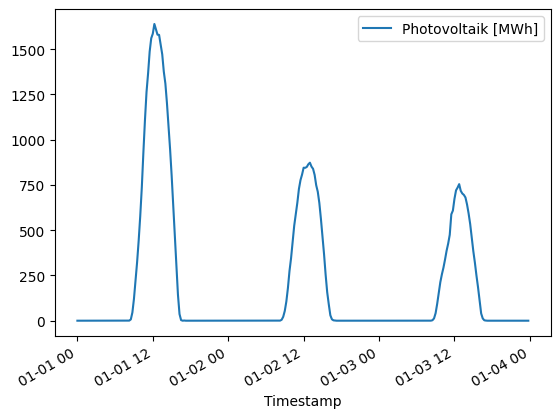

In [6]:
df.plot(x='Timestamp', y='Photovoltaik [MWh]')

In [7]:
for col in list(df.columns):
    print(col)
    print(df[col].isna().value_counts()*100/df.shape[0])
    print('\n')

Photovoltaik [MWh]
False    100.0
Name: Photovoltaik [MWh], dtype: float64


Timestamp
False    100.0
Name: Timestamp, dtype: float64




# sum up to hours 

In [61]:
df['Timestamp'] = pd.to_datetime(df['Datum'] + ' ' + df['Ende'], format='%d.%m.%Y %H:%M')
# df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
# df['Anfang'] = pd.to_datetime(df['Anfang'], format='%H:%M')
# df['Ende'] = pd.to_datetime(df['Ende'], format='%H:%M')
df = df.drop(columns=['Datum','Anfang', 'Ende'])
df = clean_column_dataframe(df, 'Photovoltaik [MWh]')
df.dtypes

/tmp/ipykernel_1804/294305874.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')


Photovoltaik [MWh]           float64
Timestamp             datetime64[ns]
dtype: object

In [57]:
df.head()

,Photovoltaik [MWh],Timestamp
0,0.0,2018-01-01 00:15:00
1,0.0,2018-01-01 00:30:00
2,0.0,2018-01-01 00:45:00
3,0.0,2018-01-01 01:00:00
4,0.0,2018-01-01 01:15:00


In [41]:
df.set_index('Timestamp', inplace=True)
df.head()

,Photovoltaik [MWh]
Timestamp,
2018-01-01 00:15:00,0.0
2018-01-01 00:30:00,0.0
2018-01-01 00:45:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 01:15:00,0.0


In [62]:
#df_hour = df[['Photovoltaik [MWh]']].groupby(df.index // 4).sum()

dict_grouping = {'Timestamp': 'last',  'Photovoltaik [MWh]': 'sum'}
df = df.groupby(df.index // 4).agg(dict_grouping)
#df_hour = df.groupby(df['Photovoltaik [MWh]'] // 4).cumsum()
df.tail(n=24)

,Timestamp,Photovoltaik [MWh]
48,2018-01-03 01:00:00,0.00
49,2018-01-03 02:00:00,0.00
50,2018-01-03 03:00:00,0.00
51,2018-01-03 04:00:00,0.00
52,2018-01-03 05:00:00,0.00
53,2018-01-03 06:00:00,0.00
54,2018-01-03 07:00:00,0.00
55,2018-01-03 08:00:00,0.00
56,2018-01-03 09:00:00,57.00
57,2018-01-03 10:00:00,715.00


# Test load function

In [15]:
solar_energy = load_green_energy_data('Photovoltaik')
solar_energy.head()

file =  2018-01-01 00:00
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-04 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-07 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-10 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-13 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-16 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-19 00:00
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-21 23:59
Photovoltaik [MWh]           float64
Timestamp             datetime64[ns]
dtype: object
file =  2018-01-22 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[n

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

file =  2018-02-22 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-02-23 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-02-24 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-02-25 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-02-26 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-02-27 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-02-28 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-03-01 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-03-02 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[n

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-05 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-06 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-07 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-08 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-09 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-10 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-11 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-04-12 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-06-19 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-06-22 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-06-25 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-06-28 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-07-01 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-07-04 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-07-07 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-07-10 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-10-20 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-10-23 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-10-26 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-10-28 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-10-31 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-11-03 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-11-06 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2018-11-09 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-02-25 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-02-28 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-03-03 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-03-06 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-03-09 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-03-12 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-03-15 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-03-18 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-02 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-05 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-08 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-11 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-14 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-17 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-20 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-07-23 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-01 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-04 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-07 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-10 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-13 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-16 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-19 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2019-11-22 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-06 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-09 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-12 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-15 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-18 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-21 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-24 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-03-27 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-05 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-08 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-11 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-14 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-17 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-20 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-23 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-07-26 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-04 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-07 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-10 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-13 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-16 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-19 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-22 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2020-11-25 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-02-23 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-02-26 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-03-01 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-03-04 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-03-07 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-03-10 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-03-13 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-03-16 23:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-06-18 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-06-21 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-06-24 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-06-27 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-06-30 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-07-03 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object
file =  2021-07-06 00:59
Photovoltaik [MWh]            object
Timestamp             datetime64[ns]
dtype: object


/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.', '')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_produced_by_companies.py:94: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c

,Timestamp,Photovoltaik [MWh]
0,2018-01-01 01:00:00,0.0
0,2020-08-10 02:00:00,0.0
0,2019-03-16 01:00:00,0.0
0,2018-05-23 02:00:00,0.0
0,2018-08-21 02:00:00,0.0


In [16]:
solar_energy.shape

(23496, 2)

<AxesSubplot:xlabel='Timestamp'>

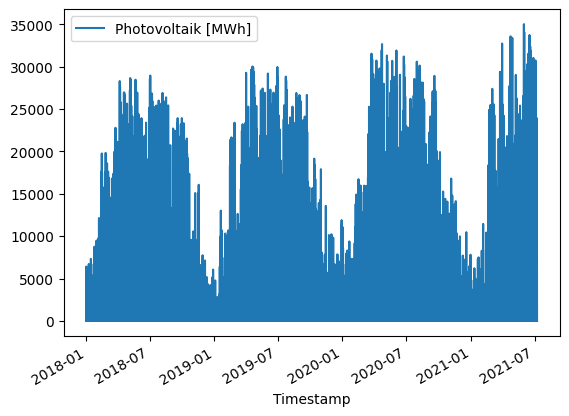

In [18]:
solar_energy.plot(x='Timestamp', y='Photovoltaik [MWh]')